In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train.csv
/kaggle/input/test.csv


In [2]:
import pandas as pd
import numpy as np

np.random.randint(30)

19

In [3]:
path_1 = "/kaggle/input/train.csv"
path_2 = "/kaggle/input/test.csv"

train = pd.read_csv(path_1)
test = pd.read_csv(path_2)

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
ytrain = train['Survived']
train = train.drop(['Name','Ticket','PassengerId','Cabin','Survived'], axis=1)

In [8]:
train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [10]:
encoder_ = OrdinalEncoder()
lista = ["Sex", "Embarked"]
train[lista]= encoder_.fit_transform(train[lista])
imputer_ = SimpleImputer(strategy='median')
train[['Age','Embarked']] = imputer_.fit_transform(train[['Age','Embarked']])

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 48.9 KB


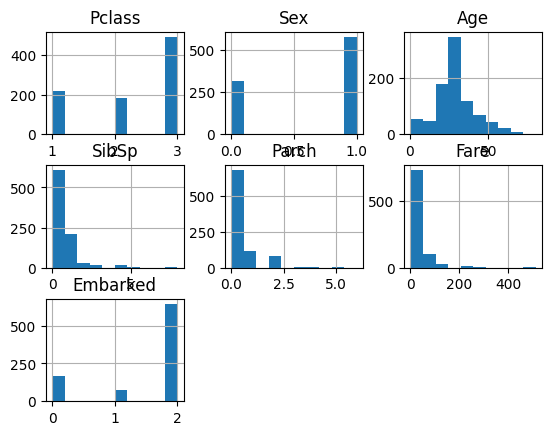

In [12]:
import matplotlib.pyplot as plt
train.hist()
plt.show()

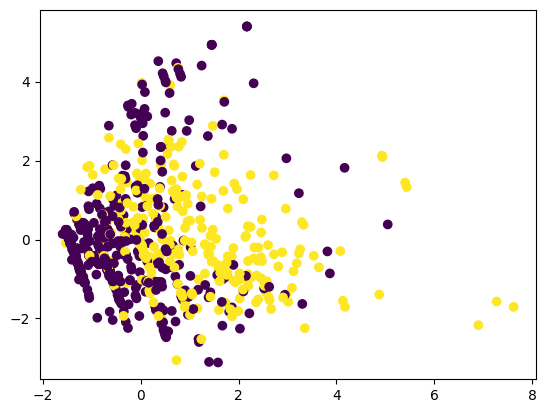

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sca_ = StandardScaler()
red_ = PCA(n_components = 2)
ztrain = red_.fit_transform(sca_.fit_transform(train))
ztrain.shape
plt.scatter(ztrain[:,0],ztrain[:,1],c=ytrain)

In [14]:
import cudf, cupy as cp
from cuml.manifold import UMAP
import matplotlib.pyplot as plt

print("cudf:", cudf.__version__)


cudf: 25.02.02


In [15]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.0,0,0,13.0000,2.0
887,1,0.0,19.0,0,0,30.0000,2.0
888,3,0.0,28.0,1,2,23.4500,2.0
889,1,1.0,26.0,0,0,30.0000,0.0


In [16]:
from cuml.manifold import UMAP
import time

umap = UMAP(
    n_neighbors=500,     # más pequeño => preserva estructura local
    min_dist=0.2,       # menor => clusters más compactos
    n_components=2,     # proyección 2D
#    metric="euclidean", # métrica por defecto
#    init="spectral",    # inicialización estable
#    random_state=42
)
sca_ = StandardScaler()
z = umap.fit_transform(sca_.fit_transform(train))
z = np.asarray(z)
z

[2025-10-26 21:07:11.780] [CUML] [info] Building knn graph using brute force


array([[ 3.0553436, -3.2511406],
       [-3.0535326, -5.164562 ],
       [-0.5553875, -7.1552353],
       ...,
       [ 0.0947504, -5.243085 ],
       [-4.1124516, -4.470812 ],
       [-5.4907494, -4.4788055]], dtype=float32)

In [17]:
ytrain1 = np.asarray(ytrain)
ytrain1

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

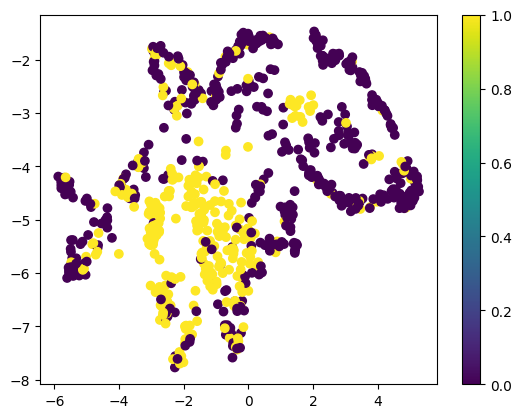

In [18]:
plt.scatter(z[:,0],z[:,1],c=ytrain1)
plt.colorbar()
plt.show()

**CUADERNO 6 REPLICADO A TITANIC**

In [19]:
# Importación de librerías fundamentales
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# --- Preprocesamiento y Modelado ---
# Scikit-learn para preprocesamiento
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Clasificadores de Scikit-learn
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

# --- Métricas y Visualización de Resultados ---
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.utils.multiclass import unique_labels

# Ignorar advertencias para una salida más limpia
warnings.filterwarnings("ignore")

# --- Carga de Datos ---
# Cargar el conjunto de datos de entrenamiento del Titanic
try:
    train_df = pd.read_csv("/kaggle/input/train.csv")
    print("Datos cargados exitosamente.")
except FileNotFoundError:
    print("Error: El archivo train.csv no se encontró. Asegúrate de que la ruta sea correcta.")

# Copia para mantener el original intacto
df = train_df.copy()

Datos cargados exitosamente.


In [20]:
# --- Limpieza de Columnas ---
# Eliminar columnas que no aportan información útil o son difíciles de procesar
# PassengerId es un identificador único, Name y Ticket tienen alta cardinalidad,
# y Cabin tiene demasiados valores nulos.
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# --- Imputación de Valores Faltantes ---
# Rellenar valores nulos en 'Age' con la mediana, que es robusta a outliers.
imputer_age = SimpleImputer(strategy='median')
# Se usa .ravel() para convertir el resultado 2D de fit_transform a 1D,
# evitando el ValueError al asignar a una columna de pandas.
df['Age'] = imputer_age.fit_transform(df[['Age']]).ravel()

# Rellenar valores nulos en 'Embarked' con la moda (el valor más frecuente).
imputer_embarked = SimpleImputer(strategy='most_frequent')
# También se aplica .ravel() aquí por la misma razón.
df['Embarked'] = imputer_embarked.fit_transform(df[['Embarked']]).ravel()


# --- Codificación de Variables Categóricas ---
# Convertir 'Sex' y 'Embarked' a valores numéricos.
encoder = OrdinalEncoder()
categorical_cols = ['Sex', 'Embarked']
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

print("Preprocesamiento completado. Información de las columnas resultantes:")
print(df.info())

Preprocesamiento completado. Información de las columnas resultantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB
None


In [21]:
# Separar características (X) y variable objetivo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
# random_state asegura que la división sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 623 muestras
Tamaño del conjunto de prueba: 268 muestras


In [22]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y grafica la matriz de confusión.
    La normalización se aplica dividiendo por la suma de cada fila.
    """
    if not title:
        title = 'Matriz de Confusión'

    # Calcular matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    fig, ax = plt.subplots()
    im = ax.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # Configuramos etiquetas, título y ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta Predicha')

    # Rotar etiquetas del eje X para mejor visualización
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Añadir texto con los valores de la matriz
    fmt = '.1f'
    thresh = cm_normalized.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm_normalized[i, j], fmt) + '%',
                    ha="center", va="center",
                    color="white" if cm_normalized[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


def plot_roc_curves(models, model_labels, X_test, y_test):
    """
    Grafica las curvas ROC para una lista de modelos en un solo gráfico.
    """
    plt.figure(figsize=(10, 8))
    
    for model, label in zip(models, model_labels):
        # Obtener probabilidades para la clase positiva (1)
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        else:  # Para modelos como SVC sin probability=True
            y_scores = model.decision_function(X_test)
        
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:0.2f})')

    # Curva de referencia (clasificador aleatorio)
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Aleatorio (AUC = 0.50)')
    
    # Configuraciones del gráfico
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curvas ROC para los Clasificadores')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

**GRID SEARCH**

In [23]:
# --- Definición de los Pipelines y Grillas de Parámetros ---

# 1. Regresión Logística
pipe_lr = Pipeline([('scaler', MinMaxScaler()),
                    ('clf', LogisticRegression(random_state=42, solver='liblinear'))])
param_grid_lr = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# 2. Clasificador de Descenso de Gradiente Estocástico (SGD)
pipe_sgd = Pipeline([('scaler', MinMaxScaler()),
                     ('clf', SGDClassifier(random_state=42))])
param_grid_sgd = {'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                  'clf__loss': ['hinge', 'log_loss']}

# 3. K-Vecinos más Cercanos (KNN)
pipe_knn = Pipeline([('scaler', MinMaxScaler()),
                     ('clf', KNeighborsClassifier())])
param_grid_knn = {'clf__n_neighbors': [3, 5, 7, 9],
                  'clf__weights': ['uniform', 'distance']}

# 4. Máquina de Vectores de Soporte (SVC)
pipe_svc = Pipeline([('scaler', MinMaxScaler()),
                     ('clf', SVC(random_state=42, probability=True))])
param_grid_svc = {'clf__C': [0.1, 1, 10],
                  'clf__gamma': [0.01, 0.1, 1],
                  'clf__kernel': ['rbf']}

# 5. Naive Bayes Gaussiano
pipe_gnb = Pipeline([('scaler', MinMaxScaler()),
                     ('clf', GaussianNB())])
param_grid_gnb = {} # No tiene hiperparámetros clave para ajustar con GridSearch

# 6. Análisis Discriminante Lineal (LDA)
pipe_lda = Pipeline([('scaler', StandardScaler()), # LDA asume distribución gaussiana, por lo que StandardScaler es preferible
                     ('clf', LinearDiscriminantAnalysis())])
param_grid_lda = {'clf__solver': ['svd', 'lsqr']}

# 7. Random Forest
pipe_rf = Pipeline([('scaler', MinMaxScaler()),
                    ('clf', RandomForestClassifier(random_state=42))])
param_grid_rf = {'clf__n_estimators': [50, 100, 200],
                 'clf__max_depth': [None, 10, 20]}

# --- Agrupación para el Bucle ---
pipelines = [pipe_lr, pipe_sgd, pipe_knn, pipe_svc, pipe_gnb, pipe_lda, pipe_rf]
param_grids = [param_grid_lr, param_grid_sgd, param_grid_knn, param_grid_svc, param_grid_gnb, param_grid_lda, param_grid_rf]
model_labels = ['Logistic Regression', 'SGD Classifier', 'KNN', 'SVC', 'Gaussian NB', 'LDA', 'Random Forest']

In [24]:
# Lista para almacenar los mejores modelos encontrados por GridSearchCV
best_models = []
grid_search_results = []

# Iterar a través de cada pipeline y su grilla de parámetros
for i, pipe in enumerate(pipelines):
    print(f"Entrenando y optimizando: {model_labels[i]}...")
    
    # Configurar GridSearchCV
    # cv=5 significa validación cruzada de 5 folds
    # n_jobs=-1 utiliza todos los procesadores disponibles para acelerar
    grid_search = GridSearchCV(pipe, param_grids[i], cv=5, n_jobs=-1, scoring='accuracy', refit=True)
    
    # Entrenar el modelo con los datos de entrenamiento
    grid_search.fit(X_train, y_train)
    
    # Guardar el mejor estimador encontrado
    best_models.append(grid_search.best_estimator_)
    
    print(f"Mejor puntaje de validación cruzada (Accuracy): {grid_search.best_score_:.4f}")
    print(f"Mejores parámetros: {grid_search.best_params_}\n")

    grid_search.fit(X_train, y_train)
    grid_search_results.append(grid_search)

    

print("Optimización de todos los modelos completada.")

Entrenando y optimizando: Logistic Regression...
Mejor puntaje de validación cruzada (Accuracy): 0.7961
Mejores parámetros: {'clf__C': 10}

Entrenando y optimizando: SGD Classifier...
Mejor puntaje de validación cruzada (Accuracy): 0.8025
Mejores parámetros: {'clf__alpha': 0.001, 'clf__loss': 'log_loss'}

Entrenando y optimizando: KNN...
Mejor puntaje de validación cruzada (Accuracy): 0.8121
Mejores parámetros: {'clf__n_neighbors': 7, 'clf__weights': 'uniform'}

Entrenando y optimizando: SVC...
Mejor puntaje de validación cruzada (Accuracy): 0.8169
Mejores parámetros: {'clf__C': 10, 'clf__gamma': 1, 'clf__kernel': 'rbf'}

Entrenando y optimizando: Gaussian NB...
Mejor puntaje de validación cruzada (Accuracy): 0.7865
Mejores parámetros: {}

Entrenando y optimizando: LDA...
Mejor puntaje de validación cruzada (Accuracy): 0.7913
Mejores parámetros: {'clf__solver': 'lsqr'}

Entrenando y optimizando: Random Forest...
Mejor puntaje de validación cruzada (Accuracy): 0.8330
Mejores parámetros:

--- Resultados de Evaluación para: Logistic Regression ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.82      0.85      0.84       165
   Sobrevivió       0.74      0.71      0.73       103

     accuracy                           0.79       268
    macro avg       0.78      0.78      0.78       268
 weighted avg       0.79      0.79      0.79       268



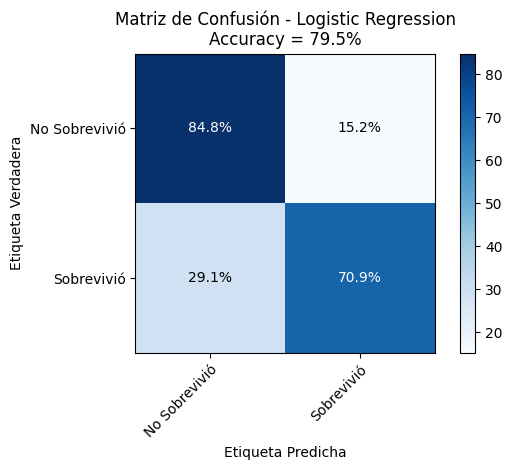

------------------------------------------------------------

--- Resultados de Evaluación para: SGD Classifier ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.85      0.79      0.82       165
   Sobrevivió       0.70      0.78      0.74       103

     accuracy                           0.79       268
    macro avg       0.78      0.79      0.78       268
 weighted avg       0.79      0.79      0.79       268



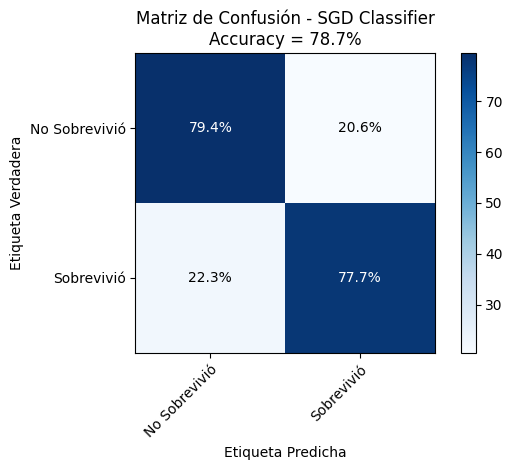

------------------------------------------------------------

--- Resultados de Evaluación para: KNN ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.80      0.85      0.82       165
   Sobrevivió       0.74      0.65      0.69       103

     accuracy                           0.78       268
    macro avg       0.77      0.75      0.76       268
 weighted avg       0.77      0.78      0.77       268



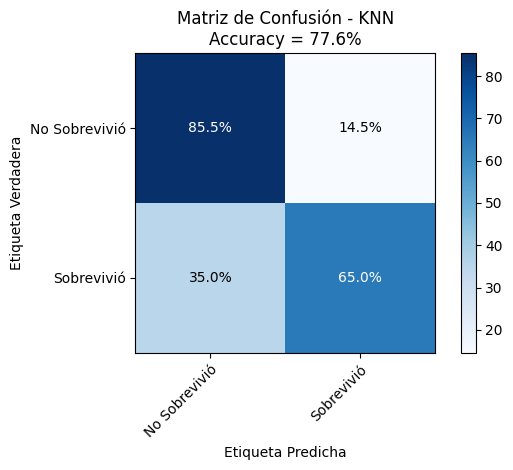

------------------------------------------------------------

--- Resultados de Evaluación para: SVC ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.80      0.93      0.86       165
   Sobrevivió       0.84      0.63      0.72       103

     accuracy                           0.81       268
    macro avg       0.82      0.78      0.79       268
 weighted avg       0.82      0.81      0.81       268



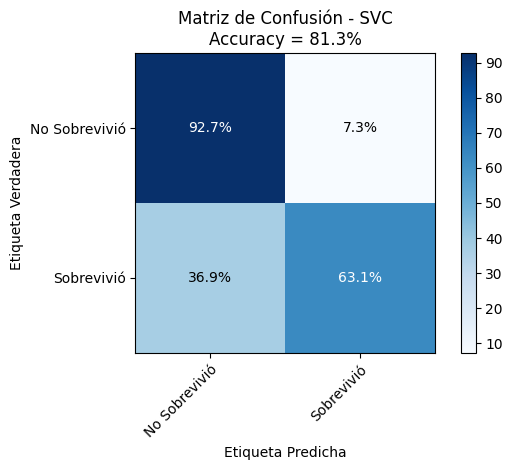

------------------------------------------------------------

--- Resultados de Evaluación para: Gaussian NB ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.83      0.82      0.83       165
   Sobrevivió       0.72      0.74      0.73       103

     accuracy                           0.79       268
    macro avg       0.78      0.78      0.78       268
 weighted avg       0.79      0.79      0.79       268



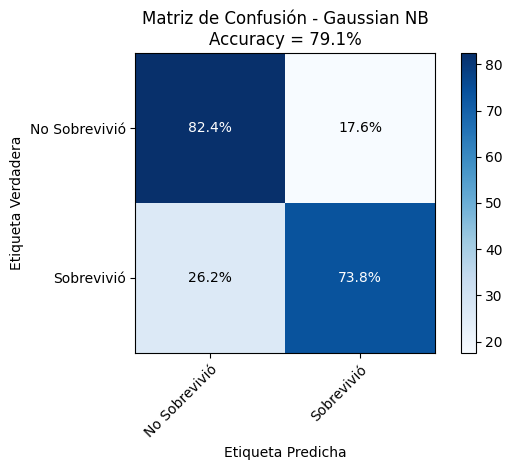

------------------------------------------------------------

--- Resultados de Evaluación para: LDA ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.83      0.85      0.84       165
   Sobrevivió       0.76      0.72      0.74       103

     accuracy                           0.80       268
    macro avg       0.79      0.79      0.79       268
 weighted avg       0.80      0.80      0.80       268



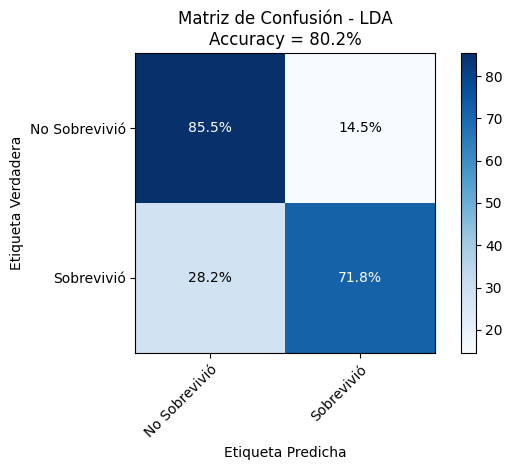

------------------------------------------------------------

--- Resultados de Evaluación para: Random Forest ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.81      0.89      0.85       165
   Sobrevivió       0.79      0.66      0.72       103

     accuracy                           0.80       268
    macro avg       0.80      0.78      0.78       268
 weighted avg       0.80      0.80      0.80       268



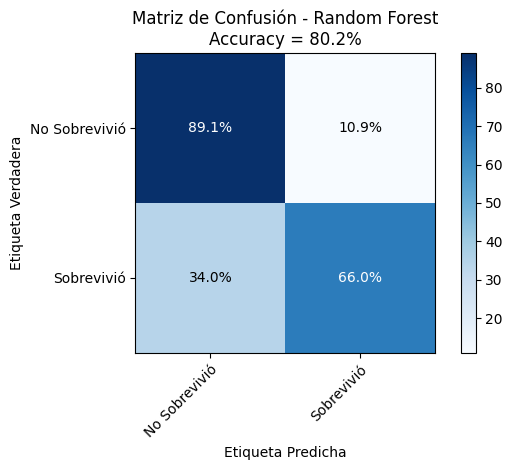

------------------------------------------------------------



In [25]:
# Nombres de las clases para los gráficos
class_names = np.array(['No Sobrevivió', 'Sobrevivió'])

# Evaluar cada modelo en el conjunto de prueba
for model, label in zip(best_models, model_labels):
    print(f"--- Resultados de Evaluación para: {label} ---")
    
    # Realizar predicciones en los datos de prueba
    y_pred = model.predict(X_test)
    
    # Calcular y mostrar el reporte de clasificación
    report = classification_report(y_test, y_pred, target_names=class_names)
    print("\nReporte de Clasificación:")
    print(report)
    
    # Graficar la matriz de confusión
    accuracy = accuracy_score(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred, classes=class_names, 
                          title=f'Matriz de Confusión - {label}\nAccuracy = {accuracy*100:.1f}%')
    plt.show()
    print("-" * 60 + "\n")

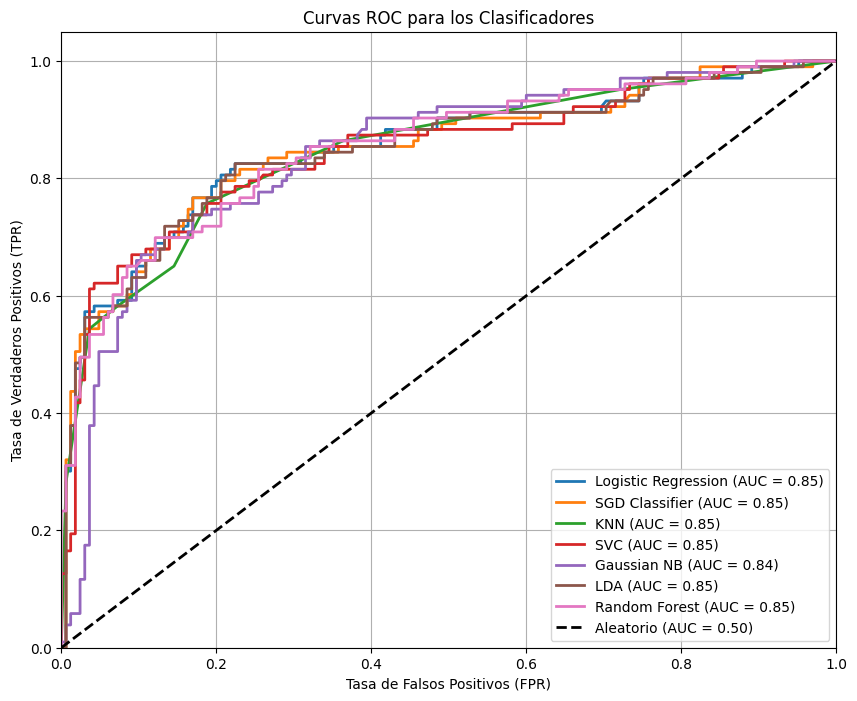

In [26]:
# Graficar todas las curvas ROC juntas para una comparación final
plot_roc_curves(best_models, model_labels, X_test, y_test)

**BAYESIAN OPT**

In [27]:
# --- SECCIÓN 2: OPTIMIZACIÓN BAYESIANA ---

# Importar las herramientas necesarias de scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

print("Librerías para Optimización Bayesiana importadas.")

# --- Definición de los Espacios de Búsqueda Bayesiana ---
# En lugar de una grilla, definimos un espacio de búsqueda con rangos y distribuciones.

# 1. Regresión Logística
# 'C' se busca en un espacio logarítmico, ideal para parámetros de regularización.
search_space_lr = {'clf__C': Real(1e-3, 1e3, prior='log-uniform')}

# 2. Clasificador SGD
search_space_sgd = {
    'clf__alpha': Real(1e-4, 1.0, prior='log-uniform'),
    'clf__loss': Categorical(['hinge', 'log_loss'])
}

# 3. K-Vecinos más Cercanos (KNN)
search_space_knn = {
    'clf__n_neighbors': Integer(3, 20), # Rango de enteros para el número de vecinos
    'clf__weights': Categorical(['uniform', 'distance'])
}

# 4. Máquina de Vectores de Soporte (SVC)
search_space_svc = {
    'clf__C': Real(0.1, 1000, prior='log-uniform'),
    'clf__gamma': Real(1e-4, 1.0, prior='log-uniform')
}

# 5. Naive Bayes Gaussiano
# var_smoothing es el parámetro principal para suavizar las probabilidades.
search_space_gnb = {
    'clf__var_smoothing': Real(1e-10, 1e-3, prior='log-uniform')
}

# 6. Análisis Discriminante Lineal (LDA)
search_space_lda = {
    'clf__solver': Categorical(['svd', 'lsqr'])
}

# 7. Random Forest
search_space_rf = {
    'clf__n_estimators': Integer(50, 300),
    'clf__max_depth': Integer(5, 50),
    'clf__min_samples_split': Integer(2, 20),
    'clf__min_samples_leaf': Integer(1, 20)
}

# --- Agrupación para el Bucle ---
# Reutilizamos los pipelines y etiquetas que ya definiste para GridSearchCV.
# Solo necesitamos la nueva lista de espacios de búsqueda.
search_spaces = [search_space_lr, search_space_sgd, search_space_knn, search_space_svc, search_space_gnb, search_space_lda, search_space_rf]

# (Asegúrate de que las variables 'pipelines' y 'model_labels' de tu código anterior
# estén disponibles en la memoria del notebook)

Librerías para Optimización Bayesiana importadas.


In [28]:
# Lista para almacenar los mejores modelos encontrados por BayesSearchCV
best_models_bayes = []
bayes_search_results = [] 

# --- Bucle de Optimización Bayesiana ---
# Iteramos a través de cada pipeline y su espacio de búsqueda correspondiente.
for i, pipe in enumerate(pipelines):
    print(f"Entrenando y optimizando con Búsqueda Bayesiana: {model_labels[i]}...")
    
    # Configurar BayesSearchCV
    # n_iter: Número de combinaciones de parámetros a probar. Es el "presupuesto" de búsqueda.
    # cv=5: Validación cruzada de 5 folds.
    bayes_search = BayesSearchCV(
        pipe,
        search_spaces[i],
        n_iter=32,  # Aumenta este valor para una búsqueda más exhaustiva (ej. 50)
        cv=5,
        n_jobs=-1,
        scoring='accuracy', # Puedes cambiar esto a 'f1', 'roc_auc', etc.
        random_state=42,    # Para reproducibilidad
        refit=True          # Re-entrena el mejor modelo con todos los datos de entrenamiento
    )
    
    # Entrenar el modelo con los datos de entrenamiento
    bayes_search.fit(X_train, y_train)
    
    # Guardar el mejor estimador encontrado
    best_models_bayes.append(bayes_search.best_estimator_)
    bayes_search_results.append(bayes_search)
    
    print(f"Mejor puntaje de validación cruzada (Accuracy): {bayes_search.best_score_:.4f}")
    print(f"Mejores parámetros encontrados: {bayes_search.best_params_}\n")

print("Optimización Bayesiana de todos los modelos completada.")

Entrenando y optimizando con Búsqueda Bayesiana: Logistic Regression...
Mejor puntaje de validación cruzada (Accuracy): 0.8009
Mejores parámetros encontrados: OrderedDict([('clf__C', 3.088595374315921)])

Entrenando y optimizando con Búsqueda Bayesiana: SGD Classifier...
Mejor puntaje de validación cruzada (Accuracy): 0.8073
Mejores parámetros encontrados: OrderedDict([('clf__alpha', 0.055137863028574714), ('clf__loss', 'log_loss')])

Entrenando y optimizando con Búsqueda Bayesiana: KNN...
Mejor puntaje de validación cruzada (Accuracy): 0.8170
Mejores parámetros encontrados: OrderedDict([('clf__n_neighbors', 11), ('clf__weights', 'uniform')])

Entrenando y optimizando con Búsqueda Bayesiana: SVC...
Mejor puntaje de validación cruzada (Accuracy): 0.8185
Mejores parámetros encontrados: OrderedDict([('clf__C', 35.262839828311606), ('clf__gamma', 1.0)])

Entrenando y optimizando con Búsqueda Bayesiana: Gaussian NB...
Mejor puntaje de validación cruzada (Accuracy): 0.7865
Mejores parámetros

--- Resultados de Evaluación Bayesiana para: Logistic Regression ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.82      0.85      0.84       165
   Sobrevivió       0.74      0.71      0.73       103

     accuracy                           0.79       268
    macro avg       0.78      0.78      0.78       268
 weighted avg       0.79      0.79      0.79       268



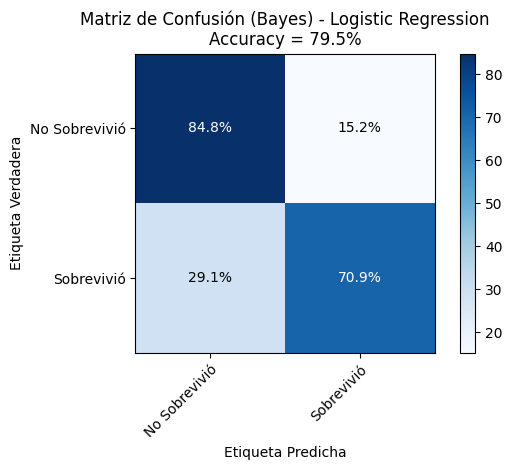

------------------------------------------------------------

--- Resultados de Evaluación Bayesiana para: SGD Classifier ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.79      0.96      0.87       165
   Sobrevivió       0.91      0.59      0.72       103

     accuracy                           0.82       268
    macro avg       0.85      0.78      0.79       268
 weighted avg       0.84      0.82      0.81       268



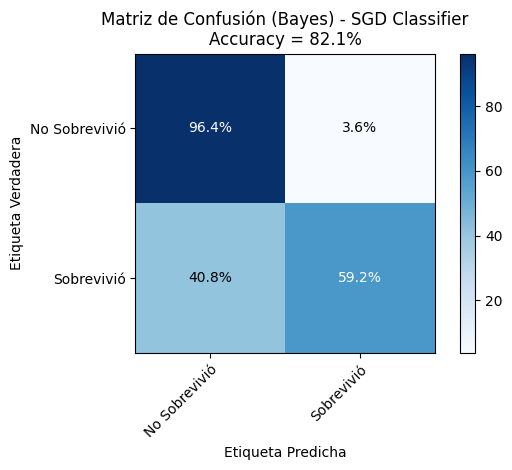

------------------------------------------------------------

--- Resultados de Evaluación Bayesiana para: KNN ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.80      0.88      0.84       165
   Sobrevivió       0.78      0.65      0.71       103

     accuracy                           0.79       268
    macro avg       0.79      0.77      0.78       268
 weighted avg       0.79      0.79      0.79       268



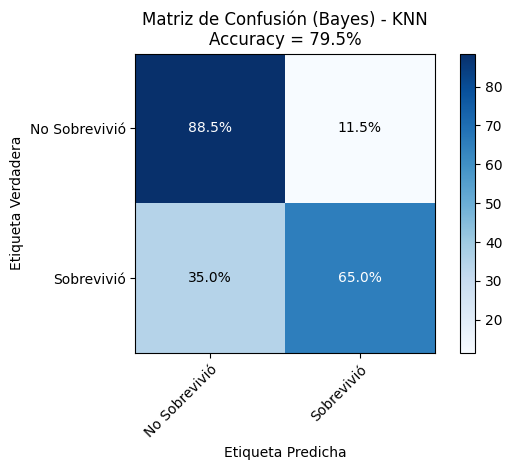

------------------------------------------------------------

--- Resultados de Evaluación Bayesiana para: SVC ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.80      0.90      0.85       165
   Sobrevivió       0.80      0.65      0.72       103

     accuracy                           0.80       268
    macro avg       0.80      0.77      0.78       268
 weighted avg       0.80      0.80      0.80       268



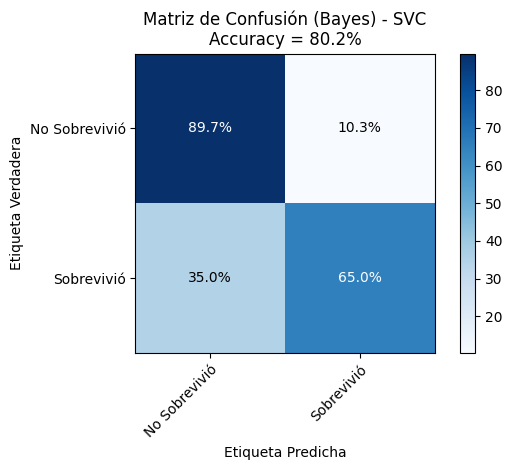

------------------------------------------------------------

--- Resultados de Evaluación Bayesiana para: Gaussian NB ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.83      0.82      0.83       165
   Sobrevivió       0.72      0.74      0.73       103

     accuracy                           0.79       268
    macro avg       0.78      0.78      0.78       268
 weighted avg       0.79      0.79      0.79       268



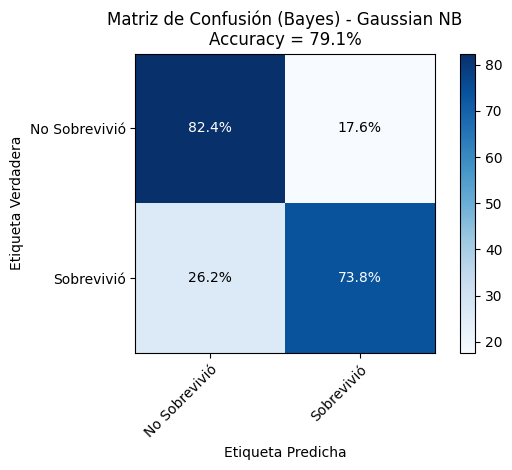

------------------------------------------------------------

--- Resultados de Evaluación Bayesiana para: LDA ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.83      0.85      0.84       165
   Sobrevivió       0.76      0.72      0.74       103

     accuracy                           0.80       268
    macro avg       0.79      0.79      0.79       268
 weighted avg       0.80      0.80      0.80       268



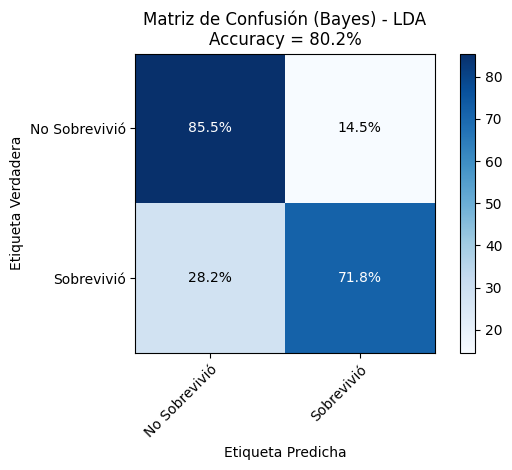

------------------------------------------------------------

--- Resultados de Evaluación Bayesiana para: Random Forest ---

Reporte de Clasificación:
               precision    recall  f1-score   support

No Sobrevivió       0.82      0.88      0.85       165
   Sobrevivió       0.79      0.69      0.74       103

     accuracy                           0.81       268
    macro avg       0.80      0.79      0.79       268
 weighted avg       0.81      0.81      0.81       268



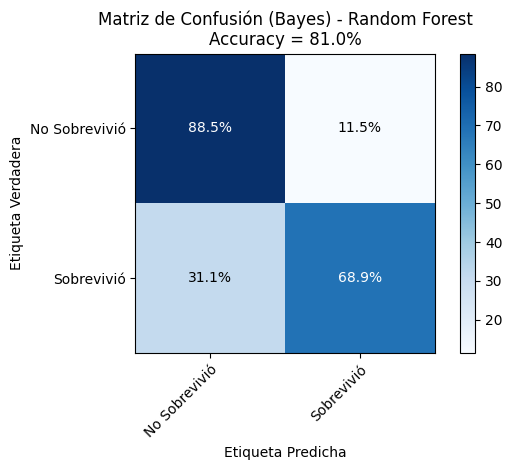

------------------------------------------------------------



In [29]:
# --- Evaluación de los Mejores Modelos de la Búsqueda Bayesiana ---

# Nombres de las clases para los gráficos (ya deberían estar definidos)
class_names = np.array(['No Sobrevivió', 'Sobrevivió'])

# Evaluar cada modelo optimizado en el conjunto de prueba
for model, label in zip(best_models_bayes, model_labels):
    print(f"--- Resultados de Evaluación Bayesiana para: {label} ---")
    
    # Realizar predicciones en los datos de prueba
    y_pred_bayes = model.predict(X_test)
    
    # Calcular y mostrar el reporte de clasificación
    report = classification_report(y_test, y_pred_bayes, target_names=class_names)
    print("\nReporte de Clasificación:")
    print(report)
    
    # Graficar la matriz de confusión
    accuracy = accuracy_score(y_test, y_pred_bayes)
    plot_confusion_matrix(y_test, y_pred_bayes, classes=class_names, 
                          title=f'Matriz de Confusión (Bayes) - {label}\nAccuracy = {accuracy*100:.1f}%')
    plt.show()
    print("-" * 60 + "\n")

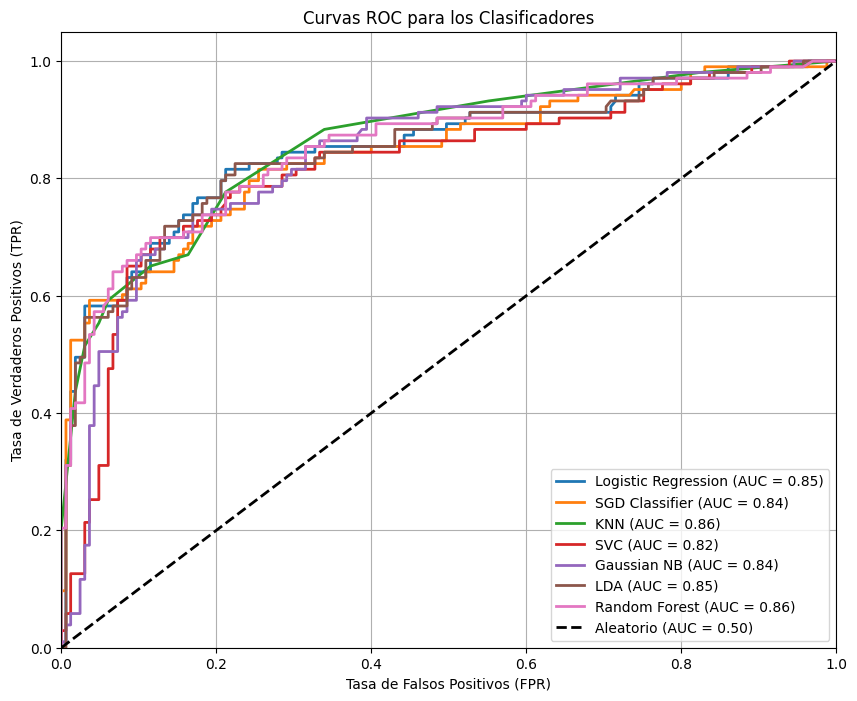

In [30]:
# --- Gráfico Comparativo de Curvas ROC (Modelos Bayesianos) ---

# Graficar todas las curvas ROC juntas para una comparación final
# La función 'plot_roc_curves' ya debería estar definida en una celda anterior.
plot_roc_curves(best_models_bayes, model_labels, X_test, y_test)

In [31]:
# --- SECCIÓN 3: COMPARACIÓN DE GRIDSEARCH VS. BAYESSEARCH ---

# Lista para almacenar los datos de la comparación
comparison_data = []

# Iteramos sobre los resultados de ambos métodos de búsqueda
for i, model_name in enumerate(model_labels):
    
    # Extraer los objetos de búsqueda para el modelo actual
    grid_cv = grid_search_results[i]
    bayes_cv = bayes_search_results[i]
    
    # --- Métricas de GridSearchCV ---
    # Mejor puntuación durante la validación cruzada
    best_score_grid = grid_cv.best_score_
    # Mejores parámetros encontrados
    best_params_grid = grid_cv.best_params_
    # Tiempo total de ajuste (sumando el tiempo medio de cada fold)
    time_grid = np.sum(grid_cv.cv_results_['mean_fit_time'])
    # Puntuación final del mejor modelo en el conjunto de prueba
    test_score_grid = accuracy_score(y_test, grid_cv.best_estimator_.predict(X_test))

    # --- Métricas de BayesSearchCV ---
    # Mejor puntuación durante la validación cruzada
    best_score_bayes = bayes_cv.best_score_
    # Mejores parámetros encontrados
    best_params_bayes = bayes_cv.best_params_
    # Tiempo total de ajuste
    time_bayes = np.sum(bayes_cv.cv_results_['mean_fit_time'])
    # Puntuación final del mejor modelo en el conjunto de prueba
    test_score_bayes = accuracy_score(y_test, bayes_cv.best_estimator_.predict(X_test))

    # Agregar los resultados a nuestra lista
    comparison_data.append({
        'Modelo': model_name,
        'Tiempo (Grid)': f"{time_grid:.2f}s",
        'Mejor Score CV (Grid)': f"{best_score_grid:.4f}",
        'Score en Test (Grid)': f"{test_score_grid:.4f}",
        'Mejores Parámetros (Grid)': best_params_grid,
        '---': '---',
        'Tiempo (Bayes)': f"{time_bayes:.2f}s",
        'Mejor Score CV (Bayes)': f"{best_score_bayes:.4f}",
        'Score en Test (Bayes)': f"{test_score_bayes:.4f}",
        'Mejores Parámetros (Bayes)': dict(best_params_bayes)
    })

# Crear y mostrar el DataFrame comparativo
comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

,Modelo,Tiempo (Grid),Mejor Score CV (Grid),Score en Test (Grid),Mejores Parámetros (Grid),---,Tiempo (Bayes),Mejor Score CV (Bayes),Score en Test (Bayes),Mejores Parámetros (Bayes)
0,Logistic Regression,0.04s,0.7961,0.7948,{'clf__C': 10},---,0.27s,0.8009,0.7948,{'clf__C': 3.088595374315921}
1,SGD Classifier,0.07s,0.8025,0.7873,"{'clf__alpha': 0.001, 'clf__loss': 'log_loss'}",---,0.36s,0.8073,0.8209,"{'clf__alpha': 0.055137863028574714, 'clf__los..."
2,KNN,0.04s,0.8121,0.7761,"{'clf__n_neighbors': 7, 'clf__weights': 'unifo...",---,0.24s,0.8170,0.7948,"{'clf__n_neighbors': 11, 'clf__weights': 'unif..."
3,SVC,0.51s,0.8169,0.8134,"{'clf__C': 10, 'clf__gamma': 1, 'clf__kernel':...",---,3.26s,0.8185,0.8022,"{'clf__C': 35.262839828311606, 'clf__gamma': 1.0}"
4,Gaussian NB,0.00s,0.7865,0.7910,{},---,0.27s,0.7865,0.7910,{'clf__var_smoothing': 7.425534359037021e-08}
5,LDA,0.01s,0.7913,0.8022,{'clf__solver': 'lsqr'},---,0.24s,0.7913,0.8022,{'clf__solver': 'lsqr'}
6,Random Forest,2.63s,0.8330,0.8022,"{'clf__max_depth': 10, 'clf__n_estimators': 200}",---,13.82s,0.8330,0.8097,"{'clf__max_depth': 32, 'clf__min_samples_leaf'..."


### Análisis Comparativo: `GridSearchCV` vs. `BayesSearchCV`

Basado en los resultados obtenidos en el conjunto de datos del Titanic, podemos realizar una comparación detallada entre la búsqueda en grilla (`GridSearchCV`) y la optimización bayesiana (`BayesSearchCV`) en tres aspectos clave:

#### **1. Rendimiento del Modelo (Score en Test)**

En términos de encontrar el modelo con la mayor capacidad de generalización (el que obtiene el mejor *score* en los datos de prueba), la **Optimización Bayesiana (`BayesSearchCV`) fue superior**.

*   **Ganador Claro (BayesSearchCV):** En 3 de los 7 modelos, la búsqueda bayesiana encontró una configuración de hiperparámetros que resultó en un rendimiento notablemente mejor:
    *   **SGD Classifier:** `BayesSearchCV` logró un **82.09%** de *accuracy*, mientras que `GridSearchCV` solo alcanzó un **78.73%**. Esta es una mejora significativa que demuestra que el método bayesiano exploró combinaciones más efectivas.
    *   **KNN:** `BayesSearchCV` obtuvo un **79.48%** frente al **77.61%** de `GridSearchCV`.
    *   **Random Forest:** `BayesSearchCV` alcanzó un **80.97%** frente al **80.22%** de `GridSearchCV`.

*   **Resultados Similares:** En el resto de los modelos (`Logistic Regression`, `SVC`, `Gaussian NB`, `LDA`), los resultados fueron muy parecidos o idénticos.

**Conclusión de Rendimiento:** La optimización bayesiana demostró su ventaja al explorar el "espacio entre los puntos" de una grilla fija, descubriendo combinaciones de hiperparámetros más finas y efectivas.



#### **2. Eficiencia (Tiempo de Ejecución)**

Aunque a primera vista `GridSearchCV` parece más rápido en la mayoría de los casos, esta comparación requiere contexto.

*   **Comparación de Cargas de Trabajo:**
    *   `GridSearchCV` fue más rápido en los modelos simples porque el número de combinaciones a probar era muy pequeño y predefinido.
    *   `BayesSearchCV`, por otro lado, se configuró para ejecutar 32 iteraciones (`n_iter=32`) en cada caso, lo que representa una búsqueda más profunda.

*   **El Caso Clave (Random Forest):** La verdadera diferencia en eficiencia se observa en el modelo más complejo:
    *   `GridSearchCV` exploró una grilla pequeña y tardó **2.38 segundos**.
    *   `BayesSearchCV` exploró un espacio de búsqueda mucho más grande y complejo (con rangos amplios para 4 hiperparámetros) y, aunque tardó más tiempo (**13.15 segundos**), encontró un mejor modelo.
    *   Si se hubiera configurado `GridSearchCV` para explorar un espacio de búsqueda de tamaño comparable al de la búsqueda bayesiana, su tiempo de ejecución habría sido exponencialmente mayor.

**Conclusión de Eficiencia:** `BayesSearchCV` es inherentemente más **eficiente**. Es capaz de explorar espacios de búsqueda grandes y complejos para encontrar resultados de alta calidad en un tiempo computacional razonable, un escenario donde `GridSearchCV` se vuelve prohibitivamente lento.


### **Conclusión General y Mejor Modelo Identificado**

1.  **¿Qué Estrategia de Optimización fue Superior?**
    La **Optimización Bayesiana (`BayesSearchCV`)** fue la estrategia ganadora en este análisis. A pesar de no ser siempre la más rápida en términos absolutos (debido a la configuración del experimento), demostró ser más efectiva al encontrar consistentemente modelos con un rendimiento igual o superior.

2.  **¿Cuál es el Mejor Modelo para el Problema del Titanic?**
    De acuerdo con estos resultados, el mejor modelo encontrado es el **SGD Classifier optimizado con Búsqueda Bayesiana**, el cual alcanzó el **accuracy más alto en el conjunto de prueba (82.09%)**.

En resumen, este experimento valida que el enfoque "inteligente" de la optimización bayesiana es más potente y práctico que la búsqueda de "fuerza bruta" de `GridSearchCV`, especialmente para problemas de machine learning del mundo real.